In [2]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [13]:
#loading csv's as data frames
apple  = pd.read_csv('./data/daily/AAPL_full.csv')
apple.head()


,date,open,high,low,close,volume,vwap
0,2023-11-27,189.92,190.67,188.90,189.79,40552609.0,189.7965
1,2023-11-28,189.78,191.08,189.40,190.40,38415419.0,190.1650
2,2023-11-29,190.90,192.09,188.97,189.37,43014224.0,189.9974
3,2023-11-30,189.84,190.32,188.19,189.95,48794366.0,189.3364
4,2023-12-01,190.33,191.56,189.23,191.24,45704823.0,190.8610


In [9]:
apple.isna().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
vwap      0
dtype: int64

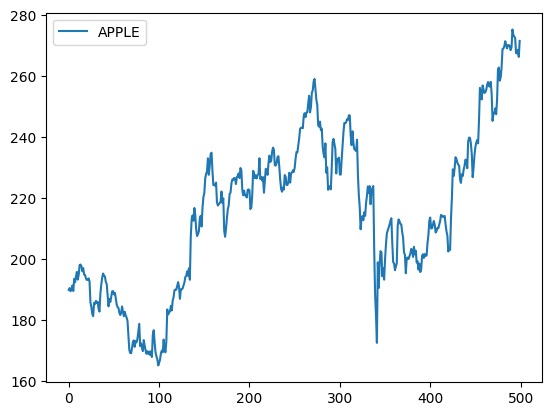

In [10]:
apple['close'].plot(label= "APPLE", legend = True)
plt.show()

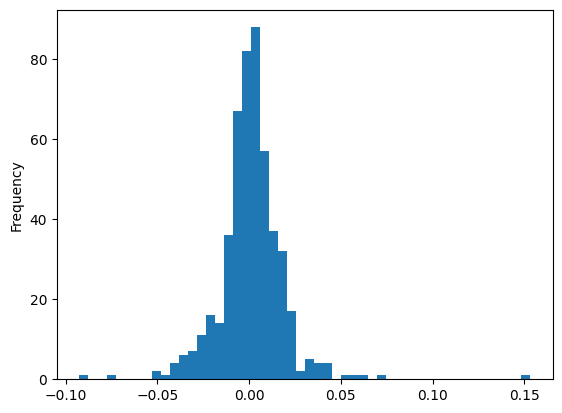

In [11]:


apple['close'].pct_change().plot.hist(bins = 50)
plt.show()

                     5d_close_pct  5d_future_close_pct
5d_close_pct             1.000000            -0.182077
5d_future_close_pct     -0.182077             1.000000


/var/folders/cs/dm8pvznj2n50smcmbhmbgzsw0000gp/T/ipykernel_97220/4070916738.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  apple['5d_future_close_pct'] = apple['5d_future_close'].pct_change(5)


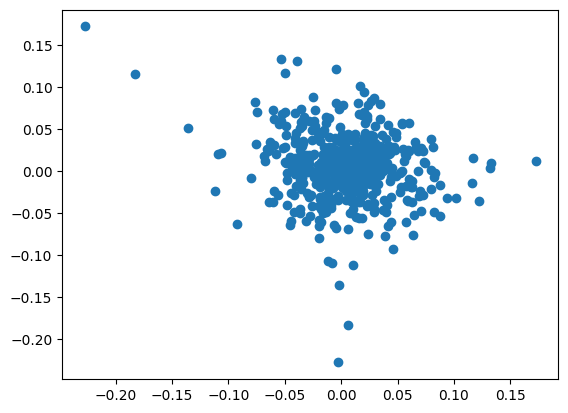

In [12]:
apple['5d_future_close'] = apple['close'].shift(-5)
apple['5d_future_close_pct'] = apple['5d_future_close'].pct_change(5)
apple['5d_close_pct'] = apple['close'].pct_change(5)


corr = apple[['5d_close_pct','5d_future_close_pct']].corr()
print(corr)
plt.scatter(apple['5d_close_pct'], apple['5d_future_close_pct'])
plt.show()

In [14]:
#need to calculate RSI's and and moving averages
apple.dropna(inplace = True)
apple['SMA_20'] = apple['close'].rolling(20).mean()

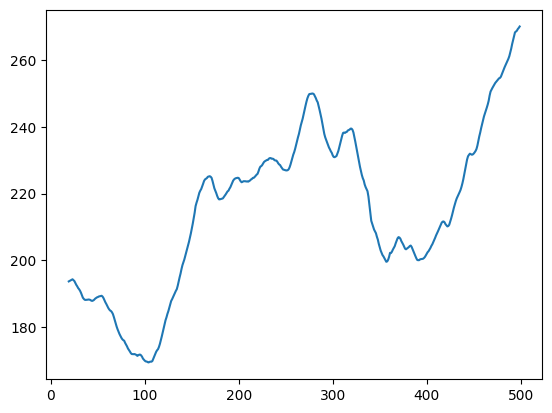

In [15]:
apple['SMA_20'].plot()
plt.show()

In [16]:
def compute_rsi(series, period=14):
    # 1. Price changes
    delta = series.diff()

    # 2. Gains (positive deltas) and losses (negative deltas)
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)

    # 3. Exponential moving average of gains/losses (Wilder's smoothing)
    avg_gain = gain.ewm(alpha=1/period, min_periods=period).mean()
    avg_loss = loss.ewm(alpha=1/period, min_periods=period).mean()

    # 4. RS and RSI
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi


In [17]:
apple['RSI_14'] = compute_rsi(apple['close'])

<Axes: >

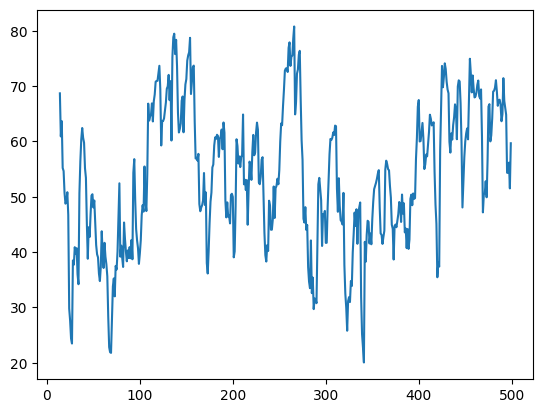

In [18]:
apple['RSI_14'].plot()

<Axes: >

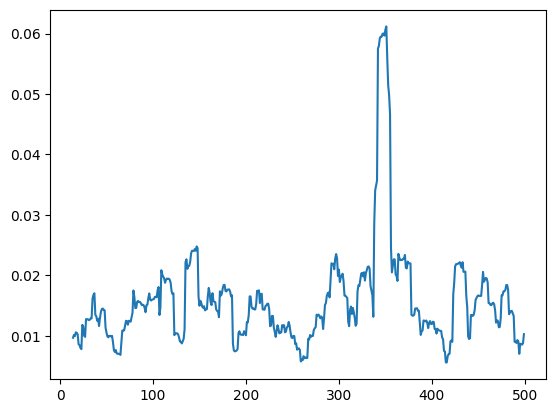

In [19]:
apple['vol14'] = apple['close'].pct_change().rolling(14).std()
apple['vol14'].plot()